In [1]:
import os
import cv2
import sys
from matplotlib import pyplot as plt
PROJECT_DIR = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(os.path.dirname(PROJECT_DIR))
# sys.path.append(PROJECT_DIR)
# sys.path.append(os.path.join(PROJECT_DIR, "text_importation"))
# sys.path.append(os.path.join(PROJECT_DIR, "ocr"))
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
os.getcwd()
print(sys.path)

['/scratch/students/zzhao/code/ajmc/ajmc/ocr/run', '/scratch/students/zzhao/anaconda3/envs/sp/lib/python38.zip', '/scratch/students/zzhao/anaconda3/envs/sp/lib/python3.8', '/scratch/students/zzhao/anaconda3/envs/sp/lib/python3.8/lib-dynload', '', '/scratch/students/zzhao/anaconda3/envs/sp/lib/python3.8/site-packages', '/scratch/students/zzhao/code/ajmc']


In [3]:
from ajmc.ocr.run.run_tesseract import PARENT_DIR, RAW_COMMENTARY_DIRS, TRAIN_COMMENTARY_DIRS, TESSDATA_DIR, TESSDATA_BEST_DIR, POGRETRA_COMMENTARY_DIRS, POGRETRA_DATA_DIR
from ajmc.ocr.run.run_tesseract import get_fig_name, test_ocr, train, get_fig_idxs, show_fig, batch_ocr, train, clean_data_tesstrain, check_missing_gt, clean_gt_folder, test_ocr_raw, evaluate_model, check_dataset_size, get_commentary_dir
from ajmc.ocr.preprocess import toolbox

In [4]:
dir_map = {
    "raw": RAW_COMMENTARY_DIRS,
    "train": TRAIN_COMMENTARY_DIRS,
    "pogretra": sorted(POGRETRA_COMMENTARY_DIRS),
}

for dataset_id in dir_map:
    print(dataset_id)
    print(dir_map[dataset_id])

print(PARENT_DIR)


raw
['Wecklein1894', 'Kamerbeek1953', 'sophoclesplaysa05campgoog', 'Paduano1982', 'lestragdiesdeso00tourgoog', 'Untersteiner1934', 'Ferrari1974', 'sophokle1v3soph', 'DeRomilly1976', 'Finglass2011', 'Colonna1975', 'bsb10234118', 'cu31924087948174', 'Garvie1998']
train
['Wecklein1894', 'sophoclesplaysa05campgoog', 'bsb10234118', 'sophokle1v3soph', 'cu31924087948174']
pogretra
['German-serifs/OU_ligature_ST_ligature/nnc1.50178386-1593613693-redux', 'German-serifs/actaphilippietac00bonnuoft', 'German-serifs/b21459162_0003', 'German-serifs/bsb10234118', 'German-serifs/bub_gb_FZbfaq7tcvAC', 'German-serifs/churchfathers', 'German-serifs/ldpd_10922736_000', 'German-serifs/platonisdialogi06plat', 'German-serifs/stoicorumveterum02arniuoft', 'Old-Teubner-serif/602250676brucerob', 'Old-Teubner-serif/Teubner-serif-training', 'Old-Teubner-serif/aeschinisoration00aesc', 'Old-Teubner-serif/deanimaliumantur02aeliuoft', 'Old-Teubner-serif/inplatonisrempu02krolgoog_teubner_serif', 'Old-Teubner-serif/poet

In [5]:
mode="pogretra" # choose from 'train' and 'raw' and 'pogretra'
commentary_name = dir_map[mode][0]
cleaned_suffix="clean-threshold"
print(commentary_name)

German-serifs/OU_ligature_ST_ligature/nnc1.50178386-1593613693-redux


In [6]:
avail_figs = get_fig_idxs(commentary_name, mode=mode, cleaned_suffix=cleaned_suffix, verbose=True)

Total img count: 593
too many images. only showing the first 100 and last 100.
['nnc1.50178386-1593613693_0010_0.png', 'nnc1.50178386-1593613693_0010_1.png', 'nnc1.50178386-1593613693_0010_10.png', 'nnc1.50178386-1593613693_0010_11.png', 'nnc1.50178386-1593613693_0010_12.png', 'nnc1.50178386-1593613693_0010_13.png', 'nnc1.50178386-1593613693_0010_14.png', 'nnc1.50178386-1593613693_0010_15.png', 'nnc1.50178386-1593613693_0010_16.png', 'nnc1.50178386-1593613693_0010_17.png', 'nnc1.50178386-1593613693_0010_18.png', 'nnc1.50178386-1593613693_0010_19.png', 'nnc1.50178386-1593613693_0010_20.png', 'nnc1.50178386-1593613693_0010_21.png', 'nnc1.50178386-1593613693_0010_22.png', 'nnc1.50178386-1593613693_0010_23.png', 'nnc1.50178386-1593613693_0010_24.png', 'nnc1.50178386-1593613693_0010_25.png', 'nnc1.50178386-1593613693_0010_26.png', 'nnc1.50178386-1593613693_0010_3.png', 'nnc1.50178386-1593613693_0010_4.png', 'nnc1.50178386-1593613693_0010_5.png', 'nnc1.50178386-1593613693_0010_6.png', 'nnc1.

In [7]:
fig_idx = avail_figs[258]
print(fig_idx)
fig_name = get_fig_name(commentary_name, fig_idx, mode=mode, cleaned_suffix=cleaned_suffix)
print(fig_name)

nnc1.50178386-1593613693_0024_6.png
/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/OU_ligature_ST_ligature/nnc1.50178386-1593613693-redux-clean-threshold/nnc1.50178386-1593613693_0024_6.png


### preprocessing

Pogretra
- German-serifs/actaphilippietac00bonnuoft/actaphilippietac00bonnuoft_0019_28.png
- use erosion np.ones((3,3))
- use opening cross_kernel(3)

### finetuning

Train
- bsb10234118/bsb10234118_0042_32.png
- use "eng+fra+finetune-grc-pogretra" vs "eng+fra+grc"

### challenge

Bad preprocessing: Pogretra
- German-serifs/OU_ligature_ST_ligature/nnc1.50178386-1593613693-redux/nnc1.50178386-1593613693_0024_5.png
- use erosion np.ones((3,3))
- use opening cross_kernel(3)

In [8]:
img = show_fig(commentary_name, fig_idx, mode=mode, cleaned_suffix=cleaned_suffix)

In [9]:
noise_img = toolbox.add_noise(img, "gaussian", show_fig=True)

In [10]:
preprocessed_img = toolbox.preprocess_img(img)
for tmp_img in preprocessed_img:
    plt.figure()
    plt.imshow(tmp_img[1], cmap='gray')
    # plt.title(tmp_img[0])
    plt.axis("off")

In [11]:
out1 = test_ocr_raw("original", TESSDATA_BEST_DIR, fig_name, img=img, img_suffix="original", lang="eng+fra+grc", save=True, viz=False, verbose=True)

OCR output: 3 " \ ~ - > ’ T 3 , » ~ 5
ἐπεὶ τὰ πρωτεῖα τοῖς ἐν πλανῃ sow ἀποδίδοται, καρ σωφρονῶσιν.

string output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/original/nnc1.50178386-1593613693_0024_6_original.str
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/original/nnc1.50178386-1593613693_0024_6_original.hocr


In [12]:
out2 = test_ocr_raw("original-finetune", TESSDATA_BEST_DIR, fig_name, img=img, img_suffix="original_finetune", lang="eng+fra+finetune-grc-pogretra", save=True, viz=False, verbose=True)

OCR output: 3 * \ ~ - > ’ T 3 , » ~ 5
ἐπεὶ τὰ πρωτεῖα τοῖς ἐν πλάνῃ sow ἀποδίδοται, κἂν σωφρονῶσιν.

string output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/original-finetune/nnc1.50178386-1593613693_0024_6_original_finetune.str
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/original-finetune/nnc1.50178386-1593613693_0024_6_original_finetune.hocr


In [13]:
out5 = test_ocr_raw("preprocessing", TESSDATA_BEST_DIR, fig_name="preprocessed", img=preprocessed_img[-1][1], img_suffix="preprocessed", lang="eng+fra+grc", save=True, viz=False, verbose=True)

OCR output: ἐπεὶ τὰ «ρωτεῖα vois ἐν πλάνῃ sow ἀποδίδοται, κἂν σωφρονῶσιν. !

string output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/preprocessing/preprocessed_preprocessed.str
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/preprocessing/preprocessed_preprocessed.hocr


In [14]:
out6 = test_ocr_raw("preprocessing", TESSDATA_BEST_DIR, fig_name="preprocessed", img=preprocessed_img[-1][1], img_suffix="preprocess_finetuned", lang="eng+fra+grc+finetune-grc-pogretra", save=True, viz=False, verbose=True)

OCR output: ἐπεὶ τὰ «ρωτεῖα vois ἐν πλάνῃ sow ἀποδίδοται, κἂν σωφρονῶσιν. !

string output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/preprocessing/preprocessed_preprocess_finetuned.str
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/preprocessing/preprocessed_preprocess_finetuned.hocr


In [15]:
out3 = test_ocr_raw("noise", TESSDATA_BEST_DIR, fig_name="noise", img=noise_img, img_suffix="noise", lang="eng+fra+grc", save=True, viz=False, verbose=True)

OCR output: ἐπεὶ τὰ πρωτεῖα τοῖς ἐν πὶ 1, κὰν σωφρονῶσιν. !


string output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/noise/noise_noise.str
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/noise/noise_noise.hocr


In [16]:
out4 = test_ocr_raw("noise-finetune", TESSDATA_BEST_DIR, fig_name="noise", img=noise_img, img_suffix="noise", lang="eng+fra+finetune-grc-pogretra", save=True, viz=False, verbose=True)

OCR output: ἐπεὶ τὰ πρωτεῖα τοῖς ἐν π 1, wey σωφρονῶσιν. !


string output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/noise-finetune/noise_noise.str
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/noise-finetune/noise_noise.hocr


OCR output: 3 " \ - - > ’ T 3 , » ~ 5
ἐπεὶ τὰ πρωτεῖα τοῖς ἐν πλανῃ sow ἀποδίδοται, καρ σωφρονῶσιν.

string output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/12-05-2022_03-05-50_test/nnc1.50178386-1593613693_0024_6.str
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/12-05-2022_03-05-50_test/nnc1.50178386-1593613693_0024_6.hocr


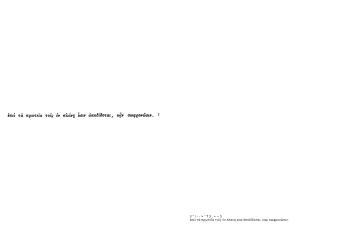

'3 " \\ - - > ’ T 3 , » ~ 5\nἐπεὶ τὰ πρωτεῖα τοῖς ἐν πλανῃ sow ἀποδίδοται, καρ σωφρονῶσιν.\n'

In [17]:
test_ocr("test", TESSDATA_DIR, commentary_name, fig_idx, lang="eng+fra+grc", mode=mode, save=True, cleaned_suffix=cleaned_suffix)

In [13]:
batch_ocr("test", TESSDATA_DIR, commentary_name, "eng+fra+grc", mode=mode, save=True, viz=False, verbose=False, cleaned_suffix=cleaned_suffix)

100%|██████████| 524/524 [1:27:37<00:00, 10.03s/it]


In [12]:
train("finetune-grc-pogretra", POGRETRA_COMMENTARY_DIRS, mode, TESSDATA_BEST_DIR, config_file=os.path.join(PROJECT_DIR, "ocr", "tesstrain_configs", "finetune.yaml"), cleaned_suffix="")

See /scratch/students/zzhao/code/ts/tesstrain/log-08-04-2022_02-28-15.txt for the training output.
make training MODEL_NAME=finetune-grc-pogretra DATA_DIR=/scratch/students/zzhao/code/ts/tessdata_best GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/ldpd_10922736_000 GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/OU_ligature_ST_ligature/nnc1.50178386-1593613693-redux GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/platonisdialogi06plat GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/actaphilippietac00bonnuoft GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/bsb10234118 GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/stoicorumveterum02arniuoft GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/bub_gb_FZbfaq7tcvAC GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/

tee: 'standard output': No space left on device


In [ ]:
# remove .box and .lstmf files from the dataset
clean_data_tesstrain(commentary_name, mode="train", cleaned_suffix="clean")

In [ ]:
# check if there is any bad ground truth files inside the dataset
check_missing_gt(commentary_name, mode="train", cleaned_suffix="")

In [ ]:
# create a new dataset and only include files with valid ground truth
clean_gt_folder(commentary_name, mode="train")

In [19]:
finetune_suffix = "clean-threshold"
train(
    f"finetune-grc-pogretra-{finetune_suffix}", 
    POGRETRA_COMMENTARY_DIRS, 
    mode, 
    TESSDATA_BEST_DIR, 
    config_file=os.path.join(PROJECT_DIR, "ocr", "tesstrain_configs", "finetune.yaml"), 
    cleaned_suffix=finetune_suffix)

See /scratch/students/zzhao/code/ts/tesstrain/log-29-04-2022_12-10-30-clean-threshold.txt for the training output.
make training MODEL_NAME=finetune-grc-pogretra-clean-threshold DATA_DIR=/scratch/students/zzhao/code/ts/tessdata_best GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/ldpd_10922736_000-clean-threshold GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/OU_ligature_ST_ligature/nnc1.50178386-1593613693-redux-clean-threshold GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/platonisdialogi06plat-clean-threshold GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/actaphilippietac00bonnuoft-clean-threshold GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/bsb10234118-clean-threshold GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/stoicorumveterum02arniuoft-clean-threshold GROUND_TRUTH_DIR=/scratch/students/z

tee: 'standard output': No space left on device


In [12]:
finetune_suffix = "clean-googletrans-resize-20"
train(
    f"finetune-grc-pogretra-{finetune_suffix}-v6", 
    POGRETRA_COMMENTARY_DIRS, 
    mode, 
    TESSDATA_BEST_DIR, 
    config_file=os.path.join(PROJECT_DIR, "ocr", "tesstrain_configs", "finetune_v6.yaml"), 
    cleaned_suffix=finetune_suffix)

See /scratch/students/zzhao/code/ts/tessdata_best/finetune-grc-pogretra-clean-googletrans-resize-20-v6/log-30-05-2022_13-05-29-clean-googletrans-resize-20.txt for the training output.
make training MODEL_NAME=finetune-grc-pogretra-clean-googletrans-resize-20-v6 DATA_DIR=/scratch/students/zzhao/code/ts/tessdata_best GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/ldpd_10922736_000-clean-googletrans-resize-20 GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/OU_ligature_ST_ligature/nnc1.50178386-1593613693-redux-clean-googletrans-resize-20 GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/platonisdialogi06plat-clean-googletrans-resize-20 GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/actaphilippietac00bonnuoft-clean-googletrans-resize-20 GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/bsb10234118-clean-googletrans-resize-20 GROUND_TRUTH_D

tee: 'standard output': No space left on device


In [20]:
retrain_suffix = "clean-threshold-resize-20"
train(
    f"retrain-grc-pogretra-{retrain_suffix}-v5", 
    POGRETRA_COMMENTARY_DIRS, 
    mode, 
    TESSDATA_BEST_DIR, 
    config_file=os.path.join(PROJECT_DIR, "ocr", "tesstrain_configs", "train-v5.yaml"), 
    cleaned_suffix=retrain_suffix)

See /scratch/students/zzhao/code/ts/tessdata_best/retrain-grc-pogretra-clean-threshold-resize-20-v5/log-29-05-2022_22-52-29-clean-threshold-resize-20.txt for the training output.
make training MODEL_NAME=retrain-grc-pogretra-clean-threshold-resize-20-v5 DATA_DIR=/scratch/students/zzhao/code/ts/tessdata_best GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/ldpd_10922736_000-clean-threshold-resize-20 GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/OU_ligature_ST_ligature/nnc1.50178386-1593613693-redux-clean-threshold-resize-20 GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/platonisdialogi06plat-clean-threshold-resize-20 GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/actaphilippietac00bonnuoft-clean-threshold-resize-20 GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/bsb10234118-clean-threshold-resize-20 GROUND_TRUTH_DIR=/scratch/studen

tee: 'standard output': No space left on device


In [ ]:
baseline_lang = {
    "cu31924087948174": [
        "grc",
        "grc+eng",
        "grc+GT4HistOCR_50000000.997_191951",
        "grc+eng+GT4HistOCR_50000000.997_191951"
    ],
    "sophokle1v3soph": [
        "grc",
        "grc+deu",
        "grc+GT4HistOCR_50000000.997_191951",
        "grc+deu+GT4HistOCR_50000000.997_191951"
    ]
}
evaluate_model(["cu31924087948174", "sophokle1v3soph"], 
    TESSDATA_BEST_DIR, 
    "",
    custom_lang=baseline_lang)

In [10]:
custom_ckpts = [
    # "grc")
    "finetune-grc-pogretra-clean-googletrans-resize-20-v3",
    "finetune-grc-pogretra-clean-googletrans-resize-20-v4",
    "finetune-grc-pogretra-clean-googletrans-resize-20-v5",
    "finetune-grc-pogretra-clean-googletrans-resize-20-v6",
    "finetune-grc-pogretra-clean-threshold-resize-20-v3",
    "finetune-grc-pogretra-clean-threshold-resize-36-v3",
    "retrain-grc-pogretra-clean-threshold-resize-20",
    "retrain-grc-pogretra-clean-threshold-resize-20-v2",
    "retrain-grc-pogretra-clean-threshold-resize-20-v3",
    "retrain-grc-pogretra-clean-threshold-resize-20-v4",
    "retrain-grc-pogretra-clean-threshold-resize-20-v5",
]

for custom_ckpt in custom_ckpts:
    custom_lang = {
        "cu31924087948174": [
            # replace grc with our ckpt
            custom_ckpt,
            f"{custom_ckpt}+eng",
            f"{custom_ckpt}+GT4HistOCR_50000000.997_191951",
            f"{custom_ckpt}+eng+GT4HistOCR_50000000.997_191951",
            # append our ckpt
            f"grc+{custom_ckpt}",
            f"grc+eng+{custom_ckpt}",
            f"grc+GT4HistOCR_50000000.997_191951+{custom_ckpt}",
            f"grc+eng+GT4HistOCR_50000000.997_191951+{custom_ckpt}"
        ],
        "sophokle1v3soph": [
            # replace grc with our ckpt
            custom_ckpt,
            f"{custom_ckpt}+deu",
            f"{custom_ckpt}+GT4HistOCR_50000000.997_191951",
            f"{custom_ckpt}+deu+GT4HistOCR_50000000.997_191951",
            # append our ckpt
            f"grc+{custom_ckpt}",
            f"grc+deu+{custom_ckpt}",
            f"grc+GT4HistOCR_50000000.997_191951+{custom_ckpt}",
            f"grc+deu+GT4HistOCR_50000000.997_191951+{custom_ckpt}"
        ],
    }
    evaluate_model(["cu31924087948174", "sophokle1v3soph"], 
        TESSDATA_BEST_DIR, 
        custom_ckpt,
        custom_lang=custom_lang)



using custom language combination
using language: finetune-grc-pogretra-clean-googletrans-resize-20-v3
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0063.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_17-46-33_finetune-grc-pogretra-clean-googletrans-resize-20-v3/outputs/cu31924087948174_0063.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0107.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_17-46-33_finetune-grc-pogretra-clean-googletrans-resize-20-v3/outputs/cu31924087948174_0107.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0051.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_17-46-33_fine

INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 1 artifacts
INFO - ajmc.commons.image -   Removed 1 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 6 artifacts
INFO - ajmc.commons.image -   Removed 6 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 3 artifacts
INFO - ajmc.commons.image -   Removed 3 artifacts


using language: finetune-grc-pogretra-clean-googletrans-resize-20-v3+eng
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0063.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_17-46-33_finetune-grc-pogretra-clean-googletrans-resize-20-v3+eng/outputs/cu31924087948174_0063.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0107.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_17-46-33_finetune-grc-pogretra-clean-googletrans-resize-20-v3+eng/outputs/cu31924087948174_0107.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0051.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_17-46-33_finetune-grc-pogretra-clea

INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 1 artifacts
INFO - ajmc.commons.image -   Removed 1 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 6 artifacts
INFO - ajmc.commons.image -   Removed 6 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 3 artifacts
INFO - ajmc.commons.image -   Removed 3 artifacts


using language: finetune-grc-pogretra-clean-googletrans-resize-20-v3+GT4HistOCR_50000000.997_191951
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0063.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_17-46-33_finetune-grc-pogretra-clean-googletrans-resize-20-v3+GT4HistOCR_50000000.997_191951/outputs/cu31924087948174_0063.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0107.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_17-46-33_finetune-grc-pogretra-clean-googletrans-resize-20-v3+GT4HistOCR_50000000.997_191951/outputs/cu31924087948174_0107.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0051.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/ev

INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 1 artifacts
INFO - ajmc.commons.image -   Removed 1 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 6 artifacts
INFO - ajmc.commons.image -   Removed 6 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 3 artifacts
INFO - ajmc.commons.image -   Removed 3 artifacts


using language: finetune-grc-pogretra-clean-googletrans-resize-20-v3+eng+GT4HistOCR_50000000.997_191951
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0063.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_17-46-33_finetune-grc-pogretra-clean-googletrans-resize-20-v3+eng+GT4HistOCR_50000000.997_191951/outputs/cu31924087948174_0063.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0107.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_17-46-33_finetune-grc-pogretra-clean-googletrans-resize-20-v3+eng+GT4HistOCR_50000000.997_191951/outputs/cu31924087948174_0107.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0051.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc

INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 1 artifacts
INFO - ajmc.commons.image -   Removed 1 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 6 artifacts
INFO - ajmc.commons.image -   Removed 6 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 3 artifacts
INFO - ajmc.commons.image -   Removed 3 artifacts


using language: grc+finetune-grc-pogretra-clean-googletrans-resize-20-v3
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0063.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_17-46-33_grc+finetune-grc-pogretra-clean-googletrans-resize-20-v3/outputs/cu31924087948174_0063.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0107.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_17-46-33_grc+finetune-grc-pogretra-clean-googletrans-resize-20-v3/outputs/cu31924087948174_0107.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0051.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_17-46-33_grc+finetune-grc-pogretra-

INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 1 artifacts
INFO - ajmc.commons.image -   Removed 1 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 6 artifacts
INFO - ajmc.commons.image -   Removed 6 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 3 artifacts
INFO - ajmc.commons.image -   Removed 3 artifacts


using language: grc+eng+finetune-grc-pogretra-clean-googletrans-resize-20-v3
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0063.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_17-46-33_grc+eng+finetune-grc-pogretra-clean-googletrans-resize-20-v3/outputs/cu31924087948174_0063.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0107.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_17-46-33_grc+eng+finetune-grc-pogretra-clean-googletrans-resize-20-v3/outputs/cu31924087948174_0107.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0051.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_17-46-33_grc+eng+finetu

INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 1 artifacts
INFO - ajmc.commons.image -   Removed 1 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 6 artifacts
INFO - ajmc.commons.image -   Removed 6 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 3 artifacts
INFO - ajmc.commons.image -   Removed 3 artifacts


using language: grc+GT4HistOCR_50000000.997_191951+finetune-grc-pogretra-clean-googletrans-resize-20-v3
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0063.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_17-46-33_grc+GT4HistOCR_50000000.997_191951+finetune-grc-pogretra-clean-googletrans-resize-20-v3/outputs/cu31924087948174_0063.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0107.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_17-46-33_grc+GT4HistOCR_50000000.997_191951+finetune-grc-pogretra-clean-googletrans-resize-20-v3/outputs/cu31924087948174_0107.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0051.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc

INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 1 artifacts
INFO - ajmc.commons.image -   Removed 1 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 6 artifacts
INFO - ajmc.commons.image -   Removed 6 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 3 artifacts
INFO - ajmc.commons.image -   Removed 3 artifacts


using language: grc+eng+GT4HistOCR_50000000.997_191951+finetune-grc-pogretra-clean-googletrans-resize-20-v3
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0063.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_17-46-33_grc+eng+GT4HistOCR_50000000.997_191951+finetune-grc-pogretra-clean-googletrans-resize-20-v3/outputs/cu31924087948174_0063.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0107.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_17-46-33_grc+eng+GT4HistOCR_50000000.997_191951+finetune-grc-pogretra-clean-googletrans-resize-20-v3/outputs/cu31924087948174_0107.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0051.png
hocr output saved to /scratch/students/zzhao/co

INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 1 artifacts
INFO - ajmc.commons.image -   Removed 1 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 6 artifacts
INFO - ajmc.commons.image -   Removed 6 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 3 artifacts
INFO - ajmc.commons.image -   Removed 3 artifacts


using custom language combination
using language: finetune-grc-pogretra-clean-googletrans-resize-20-v3
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/images/png/sophokle1v3soph_0017.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/ocr/runs/02-06-2022_17-46-33_finetune-grc-pogretra-clean-googletrans-resize-20-v3/outputs/sophokle1v3soph_0017.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/images/png/sophokle1v3soph_0012.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/ocr/runs/02-06-2022_17-46-33_finetune-grc-pogretra-clean-googletrans-resize-20-v3/outputs/sophokle1v3soph_0012.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/images/png/sophokle1v3soph_0085.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/ocr/runs/02-06-2022_17-46-33_finetune-grc-po

INFO - ajmc.commons.image -   Removed 27 artifacts
INFO - ajmc.commons.image -   Removed 27 artifacts
INFO - ajmc.commons.image -   Removed 36 artifacts
INFO - ajmc.commons.image -   Removed 36 artifacts
INFO - ajmc.commons.image -   Removed 23 artifacts
INFO - ajmc.commons.image -   Removed 23 artifacts
INFO - ajmc.commons.image -   Removed 21 artifacts
INFO - ajmc.commons.image -   Removed 21 artifacts
INFO - ajmc.commons.image -   Removed 27 artifacts
INFO - ajmc.commons.image -   Removed 27 artifacts


using language: finetune-grc-pogretra-clean-googletrans-resize-20-v3+deu
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/images/png/sophokle1v3soph_0017.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/ocr/runs/02-06-2022_17-46-33_finetune-grc-pogretra-clean-googletrans-resize-20-v3+deu/outputs/sophokle1v3soph_0017.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/images/png/sophokle1v3soph_0012.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/ocr/runs/02-06-2022_17-46-33_finetune-grc-pogretra-clean-googletrans-resize-20-v3+deu/outputs/sophokle1v3soph_0012.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/images/png/sophokle1v3soph_0085.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/ocr/runs/02-06-2022_17-46-33_finetune-grc-pogretra-clean-googletra

INFO - ajmc.commons.image -   Removed 27 artifacts
INFO - ajmc.commons.image -   Removed 27 artifacts
INFO - ajmc.commons.image -   Removed 36 artifacts
INFO - ajmc.commons.image -   Removed 36 artifacts
INFO - ajmc.commons.image -   Removed 23 artifacts
INFO - ajmc.commons.image -   Removed 23 artifacts
INFO - ajmc.commons.image -   Removed 21 artifacts
INFO - ajmc.commons.image -   Removed 21 artifacts
INFO - ajmc.commons.image -   Removed 27 artifacts
INFO - ajmc.commons.image -   Removed 27 artifacts


using language: finetune-grc-pogretra-clean-googletrans-resize-20-v3+GT4HistOCR_50000000.997_191951
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/images/png/sophokle1v3soph_0017.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/ocr/runs/02-06-2022_17-46-33_finetune-grc-pogretra-clean-googletrans-resize-20-v3+GT4HistOCR_50000000.997_191951/outputs/sophokle1v3soph_0017.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/images/png/sophokle1v3soph_0012.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/ocr/runs/02-06-2022_17-46-33_finetune-grc-pogretra-clean-googletrans-resize-20-v3+GT4HistOCR_50000000.997_191951/outputs/sophokle1v3soph_0012.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/images/png/sophokle1v3soph_0085.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/s

INFO - ajmc.commons.image -   Removed 27 artifacts
INFO - ajmc.commons.image -   Removed 27 artifacts
INFO - ajmc.commons.image -   Removed 36 artifacts
INFO - ajmc.commons.image -   Removed 36 artifacts
INFO - ajmc.commons.image -   Removed 23 artifacts
INFO - ajmc.commons.image -   Removed 23 artifacts
INFO - ajmc.commons.image -   Removed 21 artifacts
INFO - ajmc.commons.image -   Removed 21 artifacts
INFO - ajmc.commons.image -   Removed 27 artifacts
INFO - ajmc.commons.image -   Removed 27 artifacts


using language: finetune-grc-pogretra-clean-googletrans-resize-20-v3+deu+GT4HistOCR_50000000.997_191951
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/images/png/sophokle1v3soph_0017.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/ocr/runs/02-06-2022_17-46-33_finetune-grc-pogretra-clean-googletrans-resize-20-v3+deu+GT4HistOCR_50000000.997_191951/outputs/sophokle1v3soph_0017.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/images/png/sophokle1v3soph_0012.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/ocr/runs/02-06-2022_17-46-33_finetune-grc-pogretra-clean-googletrans-resize-20-v3+deu+GT4HistOCR_50000000.997_191951/outputs/sophokle1v3soph_0012.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/images/png/sophokle1v3soph_0085.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/

INFO - ajmc.commons.image -   Removed 27 artifacts
INFO - ajmc.commons.image -   Removed 27 artifacts
INFO - ajmc.commons.image -   Removed 36 artifacts
INFO - ajmc.commons.image -   Removed 36 artifacts
INFO - ajmc.commons.image -   Removed 23 artifacts
INFO - ajmc.commons.image -   Removed 23 artifacts
INFO - ajmc.commons.image -   Removed 21 artifacts
INFO - ajmc.commons.image -   Removed 21 artifacts
INFO - ajmc.commons.image -   Removed 27 artifacts
INFO - ajmc.commons.image -   Removed 27 artifacts


using language: grc+finetune-grc-pogretra-clean-googletrans-resize-20-v3
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/images/png/sophokle1v3soph_0017.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/ocr/runs/02-06-2022_17-46-33_grc+finetune-grc-pogretra-clean-googletrans-resize-20-v3/outputs/sophokle1v3soph_0017.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/images/png/sophokle1v3soph_0012.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/ocr/runs/02-06-2022_17-46-33_grc+finetune-grc-pogretra-clean-googletrans-resize-20-v3/outputs/sophokle1v3soph_0012.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/images/png/sophokle1v3soph_0085.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/ocr/runs/02-06-2022_17-46-33_grc+finetune-grc-pogretra-clean-googl

INFO - ajmc.commons.image -   Removed 27 artifacts
INFO - ajmc.commons.image -   Removed 27 artifacts
INFO - ajmc.commons.image -   Removed 36 artifacts
INFO - ajmc.commons.image -   Removed 36 artifacts
INFO - ajmc.commons.image -   Removed 23 artifacts
INFO - ajmc.commons.image -   Removed 23 artifacts
INFO - ajmc.commons.image -   Removed 21 artifacts
INFO - ajmc.commons.image -   Removed 21 artifacts
INFO - ajmc.commons.image -   Removed 27 artifacts
INFO - ajmc.commons.image -   Removed 27 artifacts


using language: grc+deu+finetune-grc-pogretra-clean-googletrans-resize-20-v3
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/images/png/sophokle1v3soph_0017.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/ocr/runs/02-06-2022_17-46-33_grc+deu+finetune-grc-pogretra-clean-googletrans-resize-20-v3/outputs/sophokle1v3soph_0017.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/images/png/sophokle1v3soph_0012.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/ocr/runs/02-06-2022_17-46-33_grc+deu+finetune-grc-pogretra-clean-googletrans-resize-20-v3/outputs/sophokle1v3soph_0012.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/images/png/sophokle1v3soph_0085.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/ocr/runs/02-06-2022_17-46-33_grc+deu+finetune-grc-pogr

INFO - ajmc.commons.image -   Removed 27 artifacts
INFO - ajmc.commons.image -   Removed 27 artifacts
INFO - ajmc.commons.image -   Removed 36 artifacts
INFO - ajmc.commons.image -   Removed 36 artifacts
INFO - ajmc.commons.image -   Removed 23 artifacts
INFO - ajmc.commons.image -   Removed 23 artifacts
INFO - ajmc.commons.image -   Removed 21 artifacts
INFO - ajmc.commons.image -   Removed 21 artifacts
INFO - ajmc.commons.image -   Removed 27 artifacts
INFO - ajmc.commons.image -   Removed 27 artifacts


using language: grc+GT4HistOCR_50000000.997_191951+finetune-grc-pogretra-clean-googletrans-resize-20-v3
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/images/png/sophokle1v3soph_0017.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/ocr/runs/02-06-2022_17-46-33_grc+GT4HistOCR_50000000.997_191951+finetune-grc-pogretra-clean-googletrans-resize-20-v3/outputs/sophokle1v3soph_0017.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/images/png/sophokle1v3soph_0012.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/ocr/runs/02-06-2022_17-46-33_grc+GT4HistOCR_50000000.997_191951+finetune-grc-pogretra-clean-googletrans-resize-20-v3/outputs/sophokle1v3soph_0012.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/images/png/sophokle1v3soph_0085.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/

INFO - ajmc.commons.image -   Removed 27 artifacts
INFO - ajmc.commons.image -   Removed 27 artifacts
INFO - ajmc.commons.image -   Removed 36 artifacts
INFO - ajmc.commons.image -   Removed 36 artifacts
INFO - ajmc.commons.image -   Removed 23 artifacts
INFO - ajmc.commons.image -   Removed 23 artifacts
INFO - ajmc.commons.image -   Removed 21 artifacts
INFO - ajmc.commons.image -   Removed 21 artifacts
INFO - ajmc.commons.image -   Removed 27 artifacts
INFO - ajmc.commons.image -   Removed 27 artifacts


using language: grc+deu+GT4HistOCR_50000000.997_191951+finetune-grc-pogretra-clean-googletrans-resize-20-v3
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/images/png/sophokle1v3soph_0017.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/ocr/runs/02-06-2022_17-46-33_grc+deu+GT4HistOCR_50000000.997_191951+finetune-grc-pogretra-clean-googletrans-resize-20-v3/outputs/sophokle1v3soph_0017.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/images/png/sophokle1v3soph_0012.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/ocr/runs/02-06-2022_17-46-33_grc+deu+GT4HistOCR_50000000.997_191951+finetune-grc-pogretra-clean-googletrans-resize-20-v3/outputs/sophokle1v3soph_0012.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/sophokle1v3soph/images/png/sophokle1v3soph_0085.png
hocr output saved to /scratch/students/zzhao/code/ajmc/aj

INFO - ajmc.commons.image -   Removed 27 artifacts
INFO - ajmc.commons.image -   Removed 27 artifacts
INFO - ajmc.commons.image -   Removed 36 artifacts
INFO - ajmc.commons.image -   Removed 36 artifacts
INFO - ajmc.commons.image -   Removed 23 artifacts
INFO - ajmc.commons.image -   Removed 23 artifacts
INFO - ajmc.commons.image -   Removed 21 artifacts
INFO - ajmc.commons.image -   Removed 21 artifacts
INFO - ajmc.commons.image -   Removed 27 artifacts
INFO - ajmc.commons.image -   Removed 27 artifacts


done
using custom language combination
using language: finetune-grc-pogretra-clean-googletrans-resize-20-v4
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0063.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_18-21-09_finetune-grc-pogretra-clean-googletrans-resize-20-v4/outputs/cu31924087948174_0063.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0107.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_18-21-09_finetune-grc-pogretra-clean-googletrans-resize-20-v4/outputs/cu31924087948174_0107.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0051.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_18-21-09

INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 1 artifacts
INFO - ajmc.commons.image -   Removed 1 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 6 artifacts
INFO - ajmc.commons.image -   Removed 6 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 3 artifacts
INFO - ajmc.commons.image -   Removed 3 artifacts


using language: finetune-grc-pogretra-clean-googletrans-resize-20-v4+eng
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0063.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_18-21-09_finetune-grc-pogretra-clean-googletrans-resize-20-v4+eng/outputs/cu31924087948174_0063.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0107.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_18-21-09_finetune-grc-pogretra-clean-googletrans-resize-20-v4+eng/outputs/cu31924087948174_0107.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0051.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_18-21-09_finetune-grc-pogretra-clea

INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 1 artifacts
INFO - ajmc.commons.image -   Removed 1 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 6 artifacts
INFO - ajmc.commons.image -   Removed 6 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 3 artifacts
INFO - ajmc.commons.image -   Removed 3 artifacts


using language: finetune-grc-pogretra-clean-googletrans-resize-20-v4+GT4HistOCR_50000000.997_191951
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0063.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_18-21-09_finetune-grc-pogretra-clean-googletrans-resize-20-v4+GT4HistOCR_50000000.997_191951/outputs/cu31924087948174_0063.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0107.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_18-21-09_finetune-grc-pogretra-clean-googletrans-resize-20-v4+GT4HistOCR_50000000.997_191951/outputs/cu31924087948174_0107.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0051.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/ev

INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 1 artifacts
INFO - ajmc.commons.image -   Removed 1 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 6 artifacts
INFO - ajmc.commons.image -   Removed 6 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 3 artifacts
INFO - ajmc.commons.image -   Removed 3 artifacts


using language: finetune-grc-pogretra-clean-googletrans-resize-20-v4+eng+GT4HistOCR_50000000.997_191951
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0063.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_18-21-09_finetune-grc-pogretra-clean-googletrans-resize-20-v4+eng+GT4HistOCR_50000000.997_191951/outputs/cu31924087948174_0063.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0107.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_18-21-09_finetune-grc-pogretra-clean-googletrans-resize-20-v4+eng+GT4HistOCR_50000000.997_191951/outputs/cu31924087948174_0107.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0051.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc

INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 1 artifacts
INFO - ajmc.commons.image -   Removed 1 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 6 artifacts
INFO - ajmc.commons.image -   Removed 6 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 3 artifacts
INFO - ajmc.commons.image -   Removed 3 artifacts


using language: grc+finetune-grc-pogretra-clean-googletrans-resize-20-v4
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0063.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_18-21-09_grc+finetune-grc-pogretra-clean-googletrans-resize-20-v4/outputs/cu31924087948174_0063.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0107.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_18-21-09_grc+finetune-grc-pogretra-clean-googletrans-resize-20-v4/outputs/cu31924087948174_0107.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0051.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_18-21-09_grc+finetune-grc-pogretra-

INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 1 artifacts
INFO - ajmc.commons.image -   Removed 1 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 6 artifacts
INFO - ajmc.commons.image -   Removed 6 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 3 artifacts
INFO - ajmc.commons.image -   Removed 3 artifacts


using language: grc+eng+finetune-grc-pogretra-clean-googletrans-resize-20-v4
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0063.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_18-21-09_grc+eng+finetune-grc-pogretra-clean-googletrans-resize-20-v4/outputs/cu31924087948174_0063.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0107.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_18-21-09_grc+eng+finetune-grc-pogretra-clean-googletrans-resize-20-v4/outputs/cu31924087948174_0107.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0051.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_18-21-09_grc+eng+finetu

INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 1 artifacts
INFO - ajmc.commons.image -   Removed 1 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 5 artifacts
INFO - ajmc.commons.image -   Removed 6 artifacts
INFO - ajmc.commons.image -   Removed 6 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 3 artifacts
INFO - ajmc.commons.image -   Removed 3 artifacts


using language: grc+GT4HistOCR_50000000.997_191951+finetune-grc-pogretra-clean-googletrans-resize-20-v4
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0063.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_18-21-09_grc+GT4HistOCR_50000000.997_191951+finetune-grc-pogretra-clean-googletrans-resize-20-v4/outputs/cu31924087948174_0063.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0107.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/ocr/runs/02-06-2022_18-21-09_grc+GT4HistOCR_50000000.997_191951+finetune-grc-pogretra-clean-googletrans-resize-20-v4/outputs/cu31924087948174_0107.hocr
/scratch/students/zzhao/code/ajmc/ajmc/ocr/exps/evaluation/cu31924087948174/images/png/cu31924087948174_0051.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ajmc

INFO - ajmc.commons.image -   Removed 4 artifacts
INFO - ajmc.commons.image -   Removed 4 artifacts


KeyboardInterrupt: 

In [8]:
check_dataset_size(POGRETRA_COMMENTARY_DIRS, mode, cleaned_suffix="clean-threshold")
check_dataset_size(POGRETRA_COMMENTARY_DIRS, mode, cleaned_suffix="clean-threshold-1.0")
check_dataset_size(POGRETRA_COMMENTARY_DIRS, mode, cleaned_suffix="clean-threshold-1.0-resize-20")
check_dataset_size(POGRETRA_COMMENTARY_DIRS, mode, cleaned_suffix="clean-googletrans")
check_dataset_size(POGRETRA_COMMENTARY_DIRS, mode, cleaned_suffix="clean-threshold-resize-36")

There are in total 28001 images within datasets: ['German-serifs/ldpd_10922736_000', 'German-serifs/OU_ligature_ST_ligature/nnc1.50178386-1593613693-redux', 'German-serifs/platonisdialogi06plat', 'German-serifs/actaphilippietac00bonnuoft', 'German-serifs/bsb10234118', 'German-serifs/stoicorumveterum02arniuoft', 'German-serifs/bub_gb_FZbfaq7tcvAC', 'German-serifs/churchfathers', 'German-serifs/b21459162_0003', 'Porson/Porson-commentaries', 'Porson/Old-Oxford', 'Porson/Porson', 'Porson/sourcesforgreek02hillgoog', 'Old-Teubner-serif/602250676brucerob', 'Old-Teubner-serif/inplatonisrempu02krolgoog_teubner_serif', 'Old-Teubner-serif/aeschinisoration00aesc', 'Old-Teubner-serif/Teubner-serif-training', 'Old-Teubner-serif/sextiempiriciope12sext07', 'Old-Teubner-serif/deanimaliumantur02aeliuoft', 'Old-Teubner-serif/poetaeminoresgra02gais']
There are in total 23504 images within datasets: ['German-serifs/ldpd_10922736_000', 'German-serifs/OU_ligature_ST_ligature/nnc1.50178386-1593613693-redux', 